<a href="https://colab.research.google.com/github/L-Shyamal/ear-echo/blob/main/Ear_Echo/Training_for_first_User.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Seperating Data and Labels
TF_data = pd.read_csv('/content/drive/MyDrive/SMU project/17-23/Data Bucket/TF_DataLahiru3RD.csv')

After_testing = TF_data[-20:]
TF_data = TF_data[:-20]

TF_data.drop(TF_data[TF_data['1440'] >= 5].index, inplace = True)
print(TF_data['1440'].value_counts())

# Seperating Data and Labels



X = TF_data.drop(columns='1440',axis=1)
Y = TF_data['1440']


# Train and Test Data
X_train_,X_test,Y_train_,Y_test = train_test_split(X,Y , test_size=0.2 ,stratify=Y, random_state=2)
X_train,X_validation,Y_train,Y_validation = train_test_split(X_train_,Y_train_ , test_size=0.17 ,stratify=Y_train_, random_state=1)



X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



print("# of training data =",X_train.shape[0])
print("# of Validation data =",X_validation.shape[0])
print("# of testdata =",X_test.shape[0])


0    55
1    55
2    55
3    55
4    55
Name: 1440, dtype: int64
# of training data = 182
# of Validation data = 38
# of testdata = 55


## Task List

Here the following facial expressions will be represented as given below .<br><br>
0  = No Action <br>
1  = Mouth Opened <br>
2  = Pull the lips conner Left<br>
3  = Pull the lips conner Right<br>
4  = Eye Brows Up <br>

In [17]:
task_list = ['No Action','Mouth Opened','Pull the lips conner Left','Pull the lips conner Right','Eye Brows Up']

In [33]:
#training the DNN model

model = Sequential()
model.add(tf.keras.layers.Dense(720*2, activation= tf.keras.layers.LeakyReLU(alpha=0.02), input_shape=(720*2,)))
model.add(tf.keras.layers.Dense(250, activation= tf.keras.layers.LeakyReLU(alpha=0.02)))
model.add(tf.keras.layers.Dense(120, activation= 'relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))
print(model.summary())


print("Training Run")
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.0008, momentum=0.08)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,Y_train, epochs=1000, batch_size=32,validation_data=(X_validation, Y_validation))


print("\n"*5)
print("Test Run")

Loss, acc = model.evaluate(X_test,Y_test)
print("Test Loss:", Loss)
print("Accuracy = ", (acc * 100.0), "%")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1440)              2075040   
                                                                 
 dense_5 (Dense)             (None, 250)               360250    
                                                                 
 dense_6 (Dense)             (None, 120)               30120     
                                                                 
 dense_7 (Dense)             (None, 5)                 605       
                                                                 
Total params: 2,466,015
Trainable params: 2,466,015
Non-trainable params: 0
_________________________________________________________________
None
Training Run
Epoch 1/1000
6/6 [==============================] - 1s 74ms/step - loss: 1.5216 - accuracy: 0.3242 - val_loss: 1.1510 - val_accuracy: 0.5263
Epoch 2/1000
6/6 

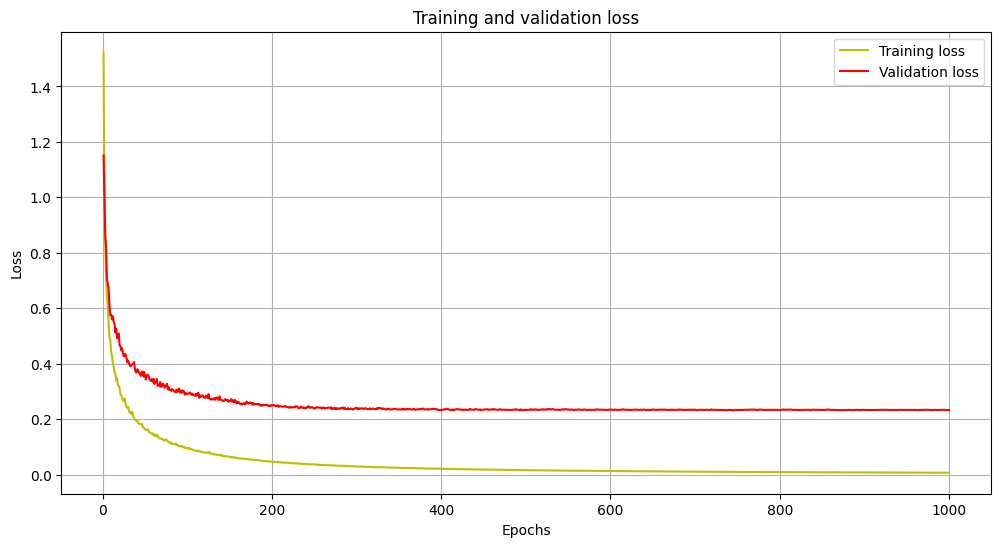

In [37]:
#plot the training and validation accuracy and loss at each epoch
plt.figure(figsize=(12, 6))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

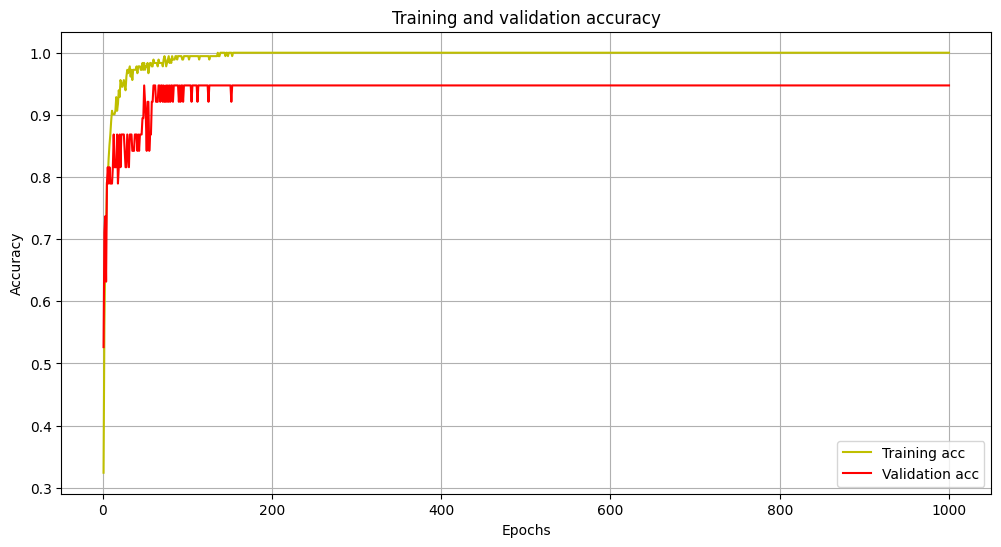

In [39]:
plt.figure(figsize=(12, 6))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [40]:
Y_predict = model.predict(X_test)
#print(len(Y_test) , len(Y_predict))
print ("Test Label--------------Predicted LAbel---------------")
for i in range(len(Y_predict)):
    p = np.argmax(Y_predict,axis= 1)[i]
    t = Y_test.iloc[i]
    print(t,"                        ",p,"            ",(int(t)==p))

2/2 [==============================] - 0s 14ms/step
Test Label--------------Predicted LAbel---------------
1                          1              True
3                          3              True
0                          0              True
2                          2              True
0                          0              True
3                          3              True
4                          4              True
1                          1              True
4                          4              True
1                          1              True
0                          0              True
0                          0              True
2                          2              True
3                          3              True
4                          4              True
1                          1              True
2                          2              True
3                          3              True
3                          3              True


In [46]:
Y_prediction = np.argmax(Y_predict,axis= 1).astype('float32')

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_prediction)

0.9636363636363636

In [47]:

print("Accuracy for 1st Person :  "+str(round(accuracy_score(Y_test,Y_prediction)*100 , 2))+' %')


1/1 [==============================] - 0s 43ms/step
Accuracy for 1st Person :  96.36 %
Accuracy for 2nd Person :  50.0 %
Accuracy for 3rd Person :  36.67 %


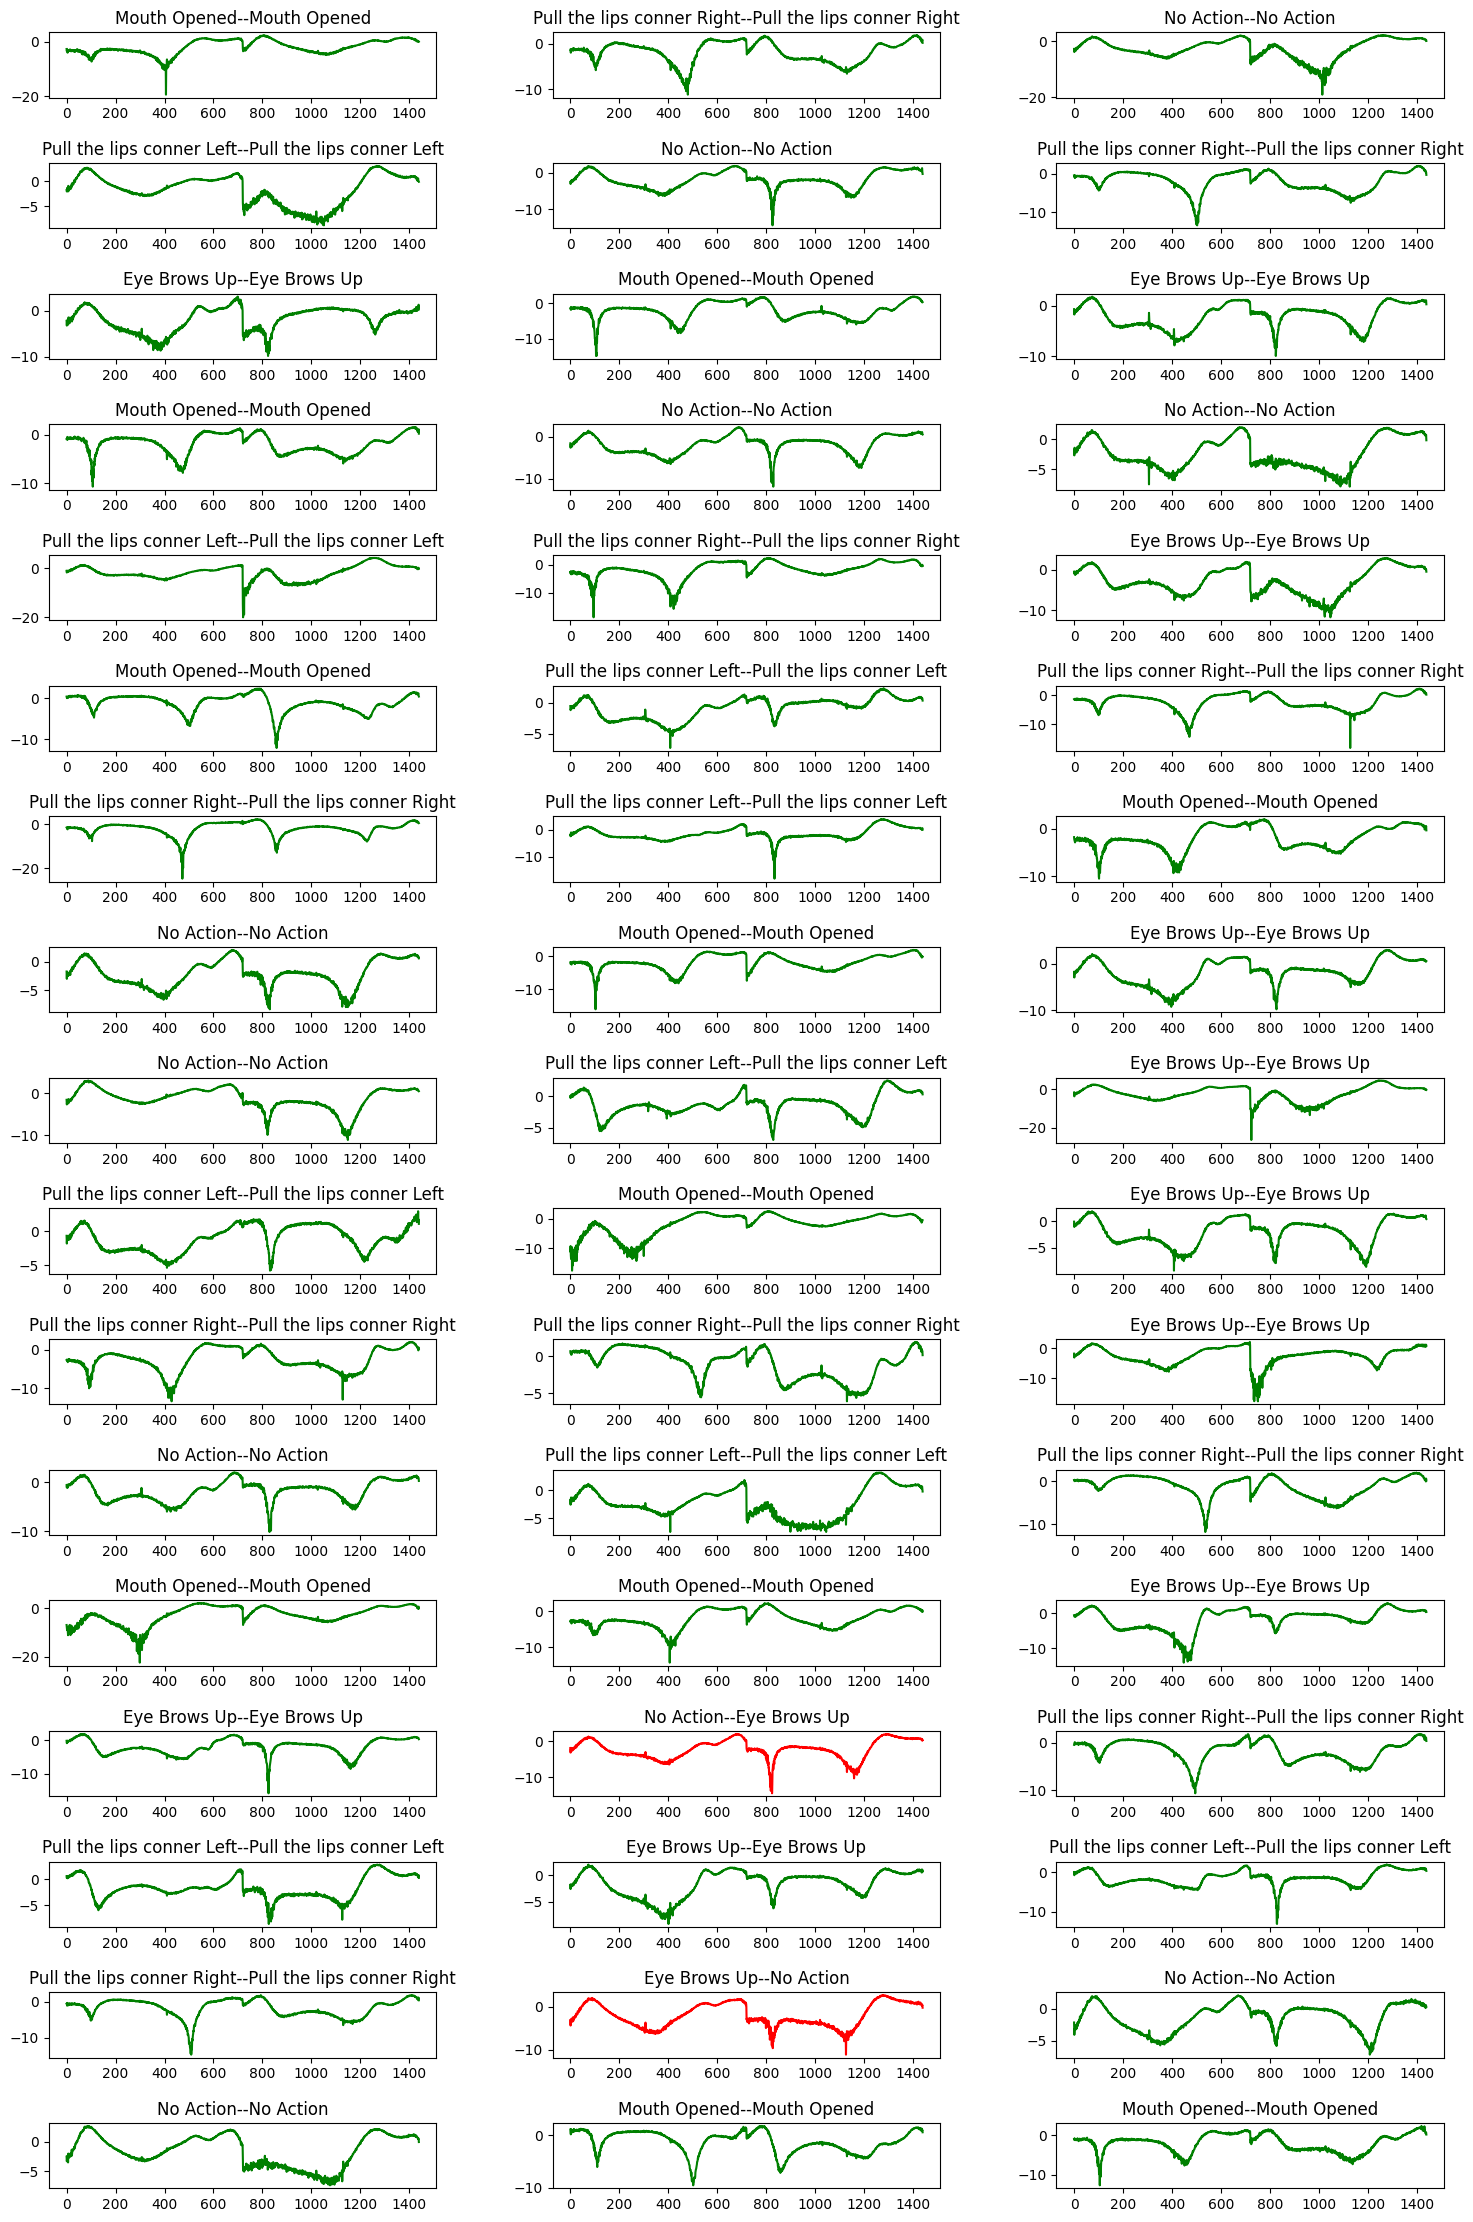

In [48]:
f = np.arange(720*2)
fig, axs = plt.subplots(17,3, figsize=(18, 28))
fig.subplots_adjust(hspace = 1, wspace=0.3)

axs = axs.ravel()

for i in range(51):

    test_name = task_list[int(Y_test.iloc[i])]
    predict_name = task_list[(np.argmax(Y_predict,axis= 1)[i])]

    if test_name==predict_name:col = 'green'
    else: col = 'red'
    axs[i].plot(f,X_test.iloc[i],color=col)
    axs[i].set_title(test_name + "--"+predict_name)

In [49]:
def get_f1_score(confusion_matrix, i):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for j in range(len(confusion_matrix)):
        if (i == j):
            TP += confusion_matrix[i, j]
            tmp = np.delete(confusion_matrix, i, 0)
            tmp = np.delete(tmp, j, 1)

            TN += np.sum(tmp)
        else:
            if (confusion_matrix[i, j] != 0):

                FN += confusion_matrix[i, j]
            if (confusion_matrix[j, i] != 0):

                FP += confusion_matrix[j, i]

    recall = TP / (FN + TP)
    precision = TP / (TP + FP)
    f1_score = 2 * 1/(1/recall + 1/precision)

    return (f1_score)

Confusion Matrix

<Axes: >

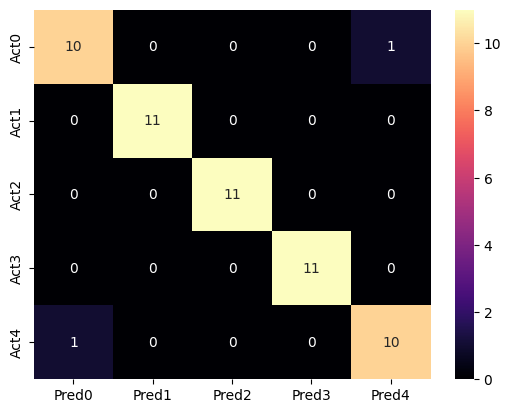

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn


def give_ConfM(ytest,ypredict):
  labels = unique_labels(Y_test)
  col = [f'Pred{lab}' for lab in labels]
  row = [f'Act{lab}' for lab in labels]

  table = pd.DataFrame(confusion_matrix(ytest,ypredict) , columns=col , index=row)
  return (table)


ConFMat= give_ConfM(Y_test,Y_prediction)
seaborn.heatmap(ConFMat , annot=True, fmt ='d' , cmap='magma')

<Axes: >

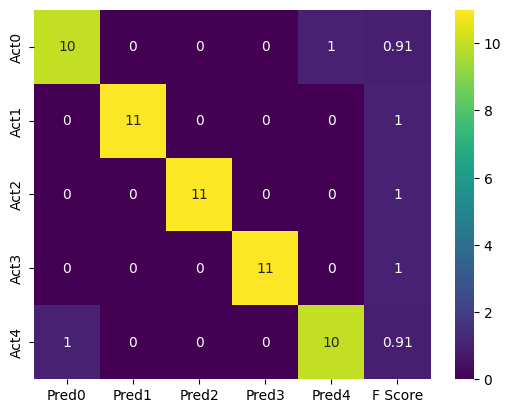

In [53]:
F_Scores =[]
for i in range(0,5):
  F_Scores.append( get_f1_score(np.array(ConFMat),i))

F_Score_table = np.append(np.array(ConFMat).T ,[F_Scores], axis=0).T
labels = unique_labels(Y_test)
col = [f'Pred{lab}' for lab in labels]+['F Score']
row = [f'Act{lab}' for lab in labels]

table = pd.DataFrame(F_Score_table , columns=col, index=row)

seaborn.heatmap( table, annot=True , cmap='viridis')

In [54]:
model.save('/content/drive/MyDrive/Ear Echo/Trained Models/SingleUser.h5')

1/1 [==============================] - 0s 34ms/step - loss: 0.0225 - accuracy: 1.0000


(0.0, 1.1)

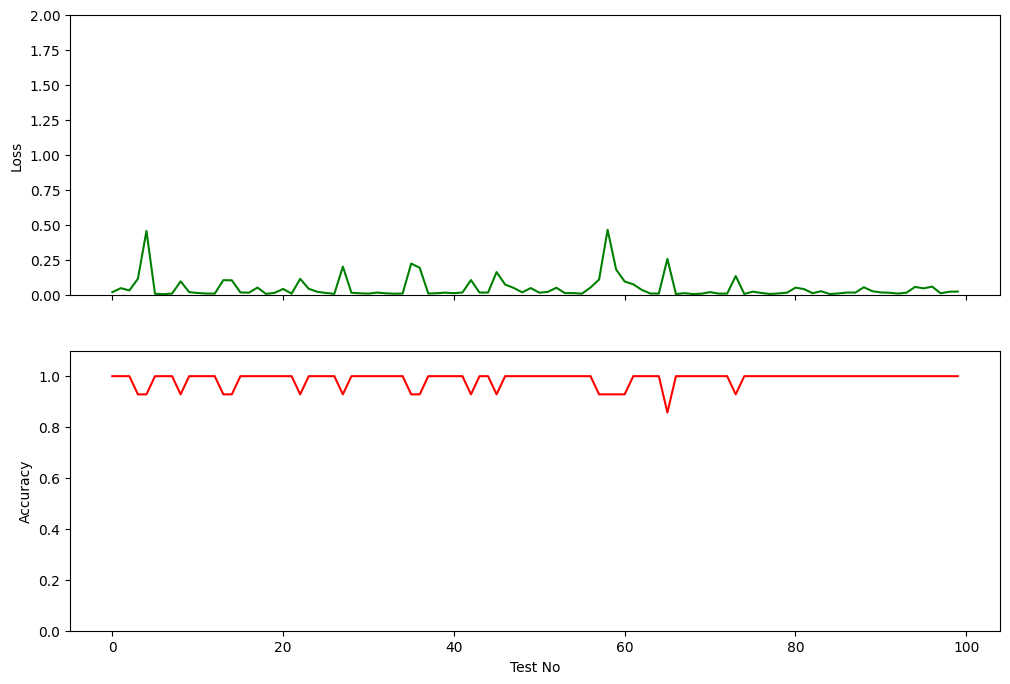

In [55]:
TestSet = []
for t in range(100):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.05 ,stratify=Y, random_state=t)

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  loss, accuracy = model.evaluate(X_test,Y_test)
  TestSet.append((t,loss,accuracy))


res = np.array(TestSet).T
fig, axs = plt.subplots(2, 1,figsize=(12,8), sharex=True)

axs[0].plot(res[0],res[1],color='green')
axs[0].set_ylabel("Loss")
axs[0].set_ylim(0,2)

axs[1].plot(res[0],res[2],color='red')
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Test No")
axs[1].set_ylim(0,1.1)

## K-fold Cross Validation

In [56]:
from sklearn.model_selection import KFold


In [57]:
skf = KFold(n_splits=14 , random_state= 7 , shuffle= True)

X_arr = X_train_.to_numpy()
Y_arr = Y_train_.to_numpy()

data_split_obj = skf.split(X_arr,Y_arr)

In [58]:
from sklearn import metrics
predicted_y = []
expected_y =[]

for train_index , test_index in skf.split(X_arr,Y_arr):
  x_train , x_test = X_arr[train_index] , X_arr[test_index]
  y_train , y_test = Y_arr[train_index] , Y_arr[test_index]

  #print("%s %s" % (x_train, y_train))
  model_X = Sequential()
  model_X.add(tf.keras.layers.Dense(720*2, activation= tf.keras.layers.LeakyReLU(alpha=0.02), input_shape=(720*2,)))
  model_X.add(tf.keras.layers.Dense(250, activation= tf.keras.layers.LeakyReLU(alpha=0.02)))
  model_X.add(tf.keras.layers.Dense(120, activation= 'relu'))
  model_X.add(tf.keras.layers.Dense(5, activation='softmax'))

  opt = tf.keras.optimizers.SGD(learning_rate=0.0008, momentum=0.08)
  model_X.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_X.fit(x_train,y_train, epochs=500, batch_size=32)

  predict_curr_fold =  np.argmax(model_X.predict(x_test) ,axis= 1).astype('float32')
  accuracy_curr_fold = metrics.accuracy_score(y_test,predict_curr_fold)

  print(" Accuracy of current fold is "+ accuracy_curr_fold.__str__())

  #store the prediction in a array
  predicted_y.extend(predict_curr_fold)

  #store the actual expectation of this fold
  expected_y.extend(y_test)





Epoch 1/500
7/7 [==============================] - 1s 24ms/step - loss: 1.7854 - accuracy: 0.2598
Epoch 2/500
7/7 [==============================] - 0s 22ms/step - loss: 1.1476 - accuracy: 0.5441
Epoch 3/500
7/7 [==============================] - 0s 26ms/step - loss: 0.9297 - accuracy: 0.6324
Epoch 4/500
7/7 [==============================] - 0s 20ms/step - loss: 0.8252 - accuracy: 0.6912
Epoch 5/500
7/7 [==============================] - 0s 33ms/step - loss: 0.7271 - accuracy: 0.7892
Epoch 6/500
7/7 [==============================] - 0s 35ms/step - loss: 0.6814 - accuracy: 0.7549
Epoch 7/500
7/7 [==============================] - 0s 33ms/step - loss: 0.6164 - accuracy: 0.8235
Epoch 8/500
7/7 [==============================] - 0s 34ms/step - loss: 0.5884 - accuracy: 0.8333
Epoch 9/500
7/7 [==============================] - 0s 31ms/step - loss: 0.5403 - accuracy: 0.8578
Epoch 10/500
7/7 [==============================] - 0s 32ms/step - loss: 0.5084 - accuracy: 0.8627
Epoch 11/500
7/7 [=

1/1 [==============================] - 0s 75ms/step
 Accuracy of current fold is 0.875
Epoch 1/500
7/7 [==============================] - 1s 22ms/step - loss: 1.6003 - accuracy: 0.3775
Epoch 2/500
7/7 [==============================] - 0s 21ms/step - loss: 1.1011 - accuracy: 0.5245
Epoch 3/500
7/7 [==============================] - 0s 22ms/step - loss: 0.8979 - accuracy: 0.6029
Epoch 4/500
7/7 [==============================] - 0s 22ms/step - loss: 0.7471 - accuracy: 0.7353
Epoch 5/500
7/7 [==============================] - 0s 23ms/step - loss: 0.6452 - accuracy: 0.7990
Epoch 6/500
7/7 [==============================] - 0s 26ms/step - loss: 0.5834 - accuracy: 0.8039
Epoch 7/500
7/7 [==============================] - 0s 24ms/step - loss: 0.5339 - accuracy: 0.8431
Epoch 8/500
7/7 [==============================] - 0s 23ms/step - loss: 0.4880 - accuracy: 0.8824
Epoch 9/500
7/7 [==============================] - 0s 25ms/step - loss: 0.4631 - accuracy: 0.8824
Epoch 10/500
7/7 [=============

Streaming output truncated to the last 5000 lines.
Epoch 6/500
7/7 [==============================] - 0s 38ms/step - loss: 0.6190 - accuracy: 0.7941
Epoch 7/500
7/7 [==============================] - 0s 34ms/step - loss: 0.5827 - accuracy: 0.7892
Epoch 8/500
7/7 [==============================] - 0s 32ms/step - loss: 0.5646 - accuracy: 0.8186
Epoch 9/500
7/7 [==============================] - 0s 35ms/step - loss: 0.4881 - accuracy: 0.8578
Epoch 10/500
7/7 [==============================] - 0s 33ms/step - loss: 0.4788 - accuracy: 0.8529
Epoch 11/500
7/7 [==============================] - 0s 34ms/step - loss: 0.4442 - accuracy: 0.8873
Epoch 12/500
7/7 [==============================] - 0s 34ms/step - loss: 0.4237 - accuracy: 0.8922
Epoch 13/500
7/7 [==============================] - 0s 31ms/step - loss: 0.4000 - accuracy: 0.9118
Epoch 14/500
7/7 [==============================] - 0s 31ms/step - loss: 0.3818 - accuracy: 0.8971
Epoch 15/500
7/7 [==============================] - 0s 37ms/st

In [59]:
final_accuracy = accuracy_score(expected_y,predicted_y)
print("Final Accuracy is  :" + round(final_accuracy*100 , 2).__str__() +" %")

Final Accuracy is  :85.91 %


In [60]:

Y_prediction_x = np.argmax(model_X.predict(X_test),axis= 1).astype('float32')


print("Accuracy for 1st Person :  "+str(round(accuracy_score(Y_test,Y_prediction_x)*100 , 2))+' %')


1/1 [==============================] - 0s 37ms/step
Accuracy for 1st Person :  100.0 %
Accuracy for 2nd Person :  44.0 %
Accuracy for 3rd Person :  36.67 %


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++